In [1]:
import pandas as pd

In [2]:
from jupyter_dash import JupyterDash
from dash import dcc
from dash import html
import plotly.express as px
import plotly.graph_objects as go

In [3]:
# app = JupyterDash(__name__)

# possession_df = df.sort_values("Possession%")
# fig = px.bar(possession_df, x="Team", y="Possession%")

# app.layout = html.Div(children=[
#     html.H1(children='Possesion by Teams'),

#     html.Div(children='''
#         Dash: A web application framework for your data.
#     '''),

#     dcc.Graph(
#         id='possession-graph',
#         figure=fig
#     )
# ])

In [4]:
# app.run_server(mode="inline", port=8060)

# Summary Stats

In [5]:
import os

In [6]:
def get_all_team_stats(league):
    all_team_stats = {
        "Season": [],
        "Total Goals": [],
        "Avg Shots Pg": [],
        "Avg Possession%": [],
        "Avg Successful Pass%": [],
        "Avg Aerials Won": []
    }

    for dir in os.listdir(f'data\\{league}'):
        all_team_stats["Season"].append(dir)
        path = os.path.join(f'data\\{league}', dir, 'stage-team-stats-summary.csv')
        df = pd.read_csv(path)
        all_team_stats["Total Goals"].append(df["Goals"].sum())
        all_team_stats["Avg Shots Pg"].append(df["Shots pg"].mean())
        all_team_stats["Avg Possession%"].append(df["Possession%"].mean())
        all_team_stats["Avg Successful Pass%"].append(df["Pass%"].mean())
        all_team_stats["Avg Aerials Won"].append(df["AerialsWon"].mean())   

    all_team_stats_df = pd.DataFrame.from_dict(all_team_stats)
    return all_team_stats_df

In [7]:
def get_top5_team_stats(league):
    top5_team_stats = {
        "Season": [],
        "Total Goals": [],
        "Avg Shots Pg": [],
        "Avg Possession%": [],
        "Avg Successful Pass%": [],
        "Avg Aerials Won": []
    }

    for dir in os.listdir(f'data\\{league}'):
        top5_team_stats["Season"].append(dir)
        path = os.path.join(f'data\\{league}', dir, 'stage-team-stats-summary.csv')
        df = pd.read_csv(path)
        temp = df.sort_values("Goals", ascending=False, ignore_index=True)
        top5_team_stats["Total Goals"].append(temp.loc[0:4]["Goals"].sum())

        temp = df.sort_values("Shots pg", ascending=False, ignore_index=True)
        top5_team_stats["Avg Shots Pg"].append(temp.loc[0:4]["Shots pg"].mean())

        temp = df.sort_values("Possession%", ascending=False, ignore_index=True)
        top5_team_stats["Avg Possession%"].append(temp.loc[0:4]["Possession%"].mean())

        temp = df.sort_values("Pass%", ascending=False, ignore_index=True)
        top5_team_stats["Avg Successful Pass%"].append(temp.loc[0:4]["Pass%"].mean())

        temp = df.sort_values("AerialsWon", ascending=False, ignore_index=True)
        top5_team_stats["Avg Aerials Won"].append(temp.loc[0:4]["AerialsWon"].mean())   

    top5_team_stats_df = pd.DataFrame.from_dict(top5_team_stats)
    return top5_team_stats_df

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

In [9]:
laliga_all = get_all_team_stats('LaLiga')
epl_all = get_all_team_stats('EPL')
bundesliga_all = get_all_team_stats('Bundesliga')
ligue1_all = get_all_team_stats('Ligue1')
seriea_all = get_all_team_stats('SerieA')

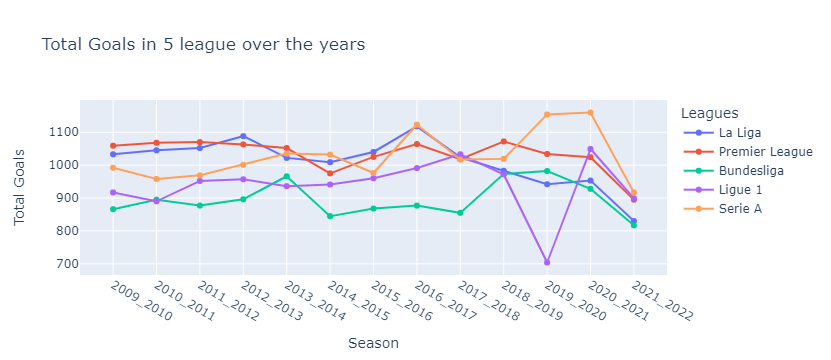

In [10]:
fig = go.Figure()
fig.add_scatter(x=laliga_all["Season"], y=laliga_all["Total Goals"], name="La Liga")
fig.add_scatter(x=epl_all["Season"], y=epl_all["Total Goals"], name="Premier League")
fig.add_scatter(x=bundesliga_all["Season"], y=bundesliga_all["Total Goals"], name="Bundesliga")
fig.add_scatter(x=ligue1_all["Season"], y=ligue1_all["Total Goals"], name="Ligue 1")
fig.add_scatter(x=seriea_all["Season"], y=seriea_all["Total Goals"], name="Serie A")
fig.update_layout(
    title="Total Goals in 5 league over the years",
    xaxis_title="Season",
    yaxis_title="Total Goals",
    legend_title="Leagues",
    # font=dict(
    #     family="Courier New, monospace",
    #     size=16,
    #     color="RebeccaPurple"
    # )
)
fig.show()

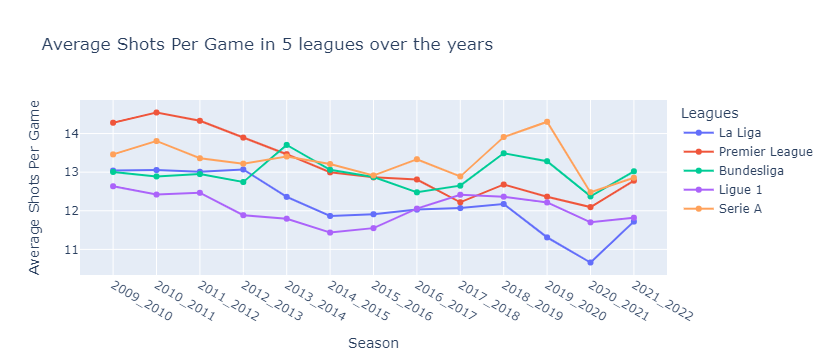

In [11]:
fig = go.Figure()
fig.add_scatter(x=laliga_all["Season"], y=laliga_all["Avg Shots Pg"], name="La Liga")
fig.add_scatter(x=epl_all["Season"], y=epl_all["Avg Shots Pg"], name="Premier League")
fig.add_scatter(x=bundesliga_all["Season"], y=bundesliga_all["Avg Shots Pg"], name="Bundesliga")
fig.add_scatter(x=ligue1_all["Season"], y=ligue1_all["Avg Shots Pg"], name="Ligue 1")
fig.add_scatter(x=seriea_all["Season"], y=seriea_all["Avg Shots Pg"], name="Serie A")
fig.update_layout(
    title="Average Shots Per Game in 5 leagues over the years",
    xaxis_title="Season",
    yaxis_title="Average Shots Per Game",
    legend_title="Leagues"
)
fig.show()

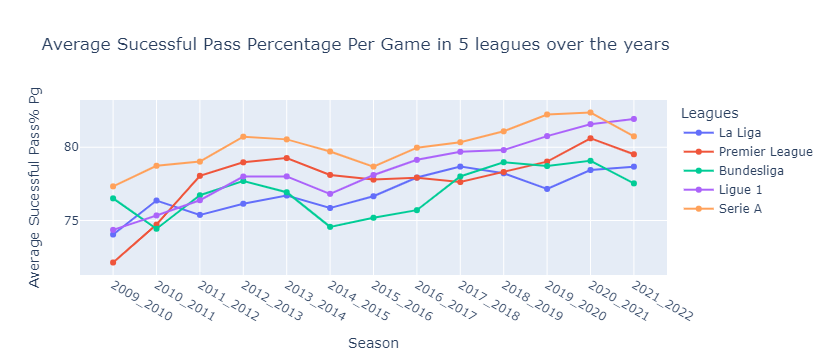

In [12]:
fig = go.Figure()
fig.add_scatter(x=laliga_all["Season"], y=laliga_all["Avg Successful Pass%"], name="La Liga")
fig.add_scatter(x=epl_all["Season"], y=epl_all["Avg Successful Pass%"], name="Premier League")
fig.add_scatter(x=bundesliga_all["Season"], y=bundesliga_all["Avg Successful Pass%"], name="Bundesliga")
fig.add_scatter(x=ligue1_all["Season"], y=ligue1_all["Avg Successful Pass%"], name="Ligue 1")
fig.add_scatter(x=seriea_all["Season"], y=seriea_all["Avg Successful Pass%"], name="Serie A")
fig.update_layout(
    title="Average Sucessful Pass Percentage Per Game in 5 leagues over the years",
    xaxis_title="Season",
    yaxis_title="Average Sucessful Pass% Pg",
    legend_title="Leagues"
)
fig.show()

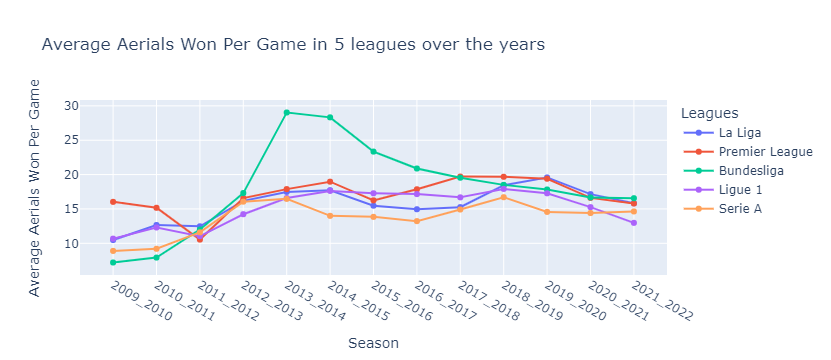

In [13]:
fig = go.Figure()
fig.add_scatter(x=laliga_all["Season"], y=laliga_all["Avg Aerials Won"], name="La Liga")
fig.add_scatter(x=epl_all["Season"], y=epl_all["Avg Aerials Won"], name="Premier League")
fig.add_scatter(x=bundesliga_all["Season"], y=bundesliga_all["Avg Aerials Won"], name="Bundesliga")
fig.add_scatter(x=ligue1_all["Season"], y=ligue1_all["Avg Aerials Won"], name="Ligue 1")
fig.add_scatter(x=seriea_all["Season"], y=seriea_all["Avg Aerials Won"], name="Serie A")
fig.update_layout(
    title="Average Aerials Won Per Game in 5 leagues over the years",
    xaxis_title="Season",
    yaxis_title="Average Aerials Won Per Game",
    legend_title="Leagues"
)
fig.show()

# Goal Types

## Staked Bar Chart Goal type

In [14]:
def get_league_goal_type_df(league):
    all_team_stats = {
        "Season": [],
        "Open Play": [],
        "Counter Attack": [],
        "Set Piece": [],
        "Penalty": [],
        "Own Goal": []
    }

    for dir in os.listdir(f'data\\{league}'):
        all_team_stats["Season"].append(dir)
        path = os.path.join(f'data\\{league}', dir, 'stage-goals-for.csv')
        df = pd.read_csv(path)
        all_team_stats["Open Play"].append(df["Open Play"].sum())
        all_team_stats["Counter Attack"].append(df["Counter Attack"].sum())
        all_team_stats["Set Piece"].append(df["Set Piece"].sum())
        all_team_stats["Penalty"].append(df["Penalty"].sum())
        all_team_stats["Own Goal"].append(df["Own Goal"].sum())

    all_team_stats_df = pd.DataFrame.from_dict(all_team_stats)
    return all_team_stats_df

In [15]:
def stacked_bar_chart_goal_type(league_goal_type, league):
    x = league_goal_type['Season']
    fig = go.Figure()

    fig.add_trace(go.Scatter(
        x=x, y=league_goal_type["Open Play"],
        mode='lines',
        name="Open Play",
        stackgroup='one',
        groupnorm='percent'
    ))
    fig.add_trace(go.Scatter(
        x=x, y=league_goal_type["Counter Attack"],
        mode='lines',
        name="Counter Attack",
        stackgroup='one'
    ))
    fig.add_trace(go.Scatter(
        x=x, y=league_goal_type["Set Piece"],
        mode='lines',
        name="Set Piece",
        stackgroup='one'
    ))
    fig.add_trace(go.Scatter(
        x=x, y=league_goal_type["Penalty"],
        mode='lines',
        name="Penalty",
        stackgroup='one'
    ))
    fig.add_trace(go.Scatter(
        x=x, y=league_goal_type["Own Goal"],
        mode='lines',
        name="Own Goal",
        stackgroup='one'
    ))
    fig.update_layout(
        title=f"Goal Types% in {league} over the years",
        xaxis_title="Season",
        yaxis_title="Goal Types%",
        legend_title="Goal Types",
        yaxis=dict(
            type='linear',
            range=[1, 100],
            ticksuffix='%')
    )

    fig.show()

In [16]:
def grouped_bar_chart_goals_type(league_goal_type, league):
    x = league_goal_type['Season']
    goal_type = ['Open Play', 'Counter Attack', 'Set Piece', 'Penalty', 'Own Goal']
    league_goal_type_normalized = league_goal_type[goal_type].div(league_goal_type[goal_type].sum(axis=1), axis=0) * 100
    
    fig = go.Figure(data=[
        go.Bar(name='Open Play', x=x, y=league_goal_type_normalized['Open Play']),
        go.Bar(name='Set Piece', x=x, y=league_goal_type_normalized['Set Piece']),
        go.Bar(name='Counter Attack', x=x, y=league_goal_type_normalized['Counter Attack']),
        go.Bar(name='Penalty', x=x, y=league_goal_type_normalized['Penalty']),
        go.Bar(name='Own Goal', x=x, y=league_goal_type_normalized['Own Goal'])
    ])
    fig.update_layout(
        barmode='group',
        title=f"Goal Types% in {league} over the years",
        xaxis_title="Season",
        yaxis_title="Goal Types%",
        legend_title="Goal Types",
        yaxis=dict(
            type='linear',
            range=[1, 100],
            ticksuffix='%'))
    fig.show()

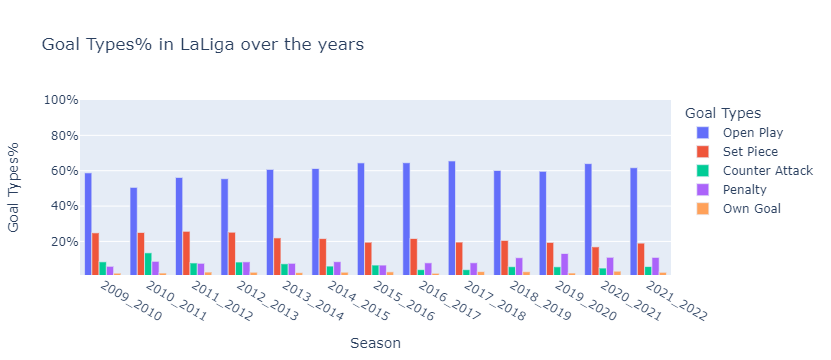

In [17]:
laliga_goal_type = get_league_goal_type_df('LaLiga')
grouped_bar_chart_goals_type(laliga_goal_type, 'LaLiga')

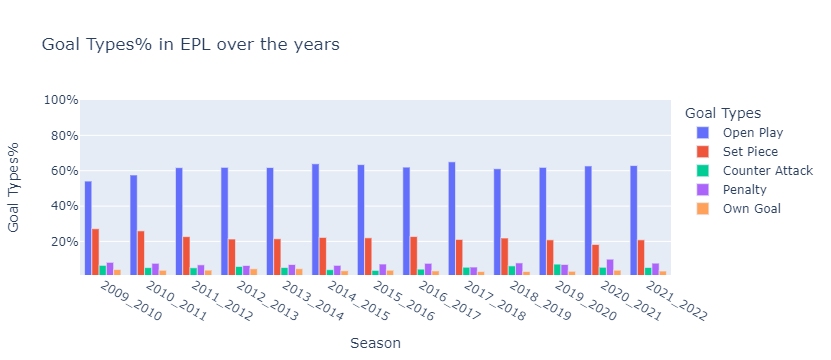

In [18]:
epl_goal_type = get_league_goal_type_df('EPL')
grouped_bar_chart_goals_type(epl_goal_type, 'EPL')

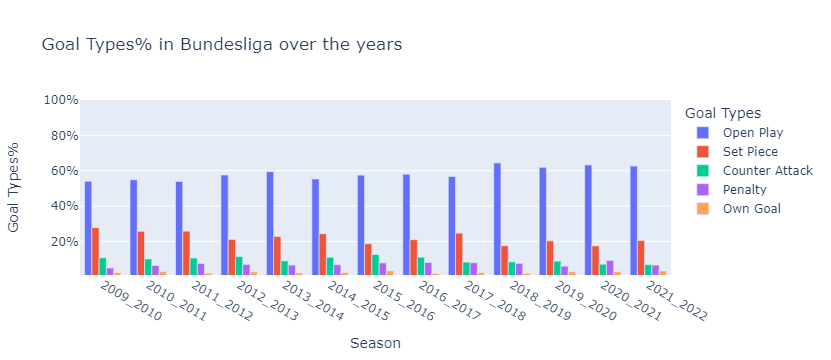

In [19]:
bundesliga_goal_type = get_league_goal_type_df('Bundesliga')
grouped_bar_chart_goals_type(bundesliga_goal_type, 'Bundesliga')

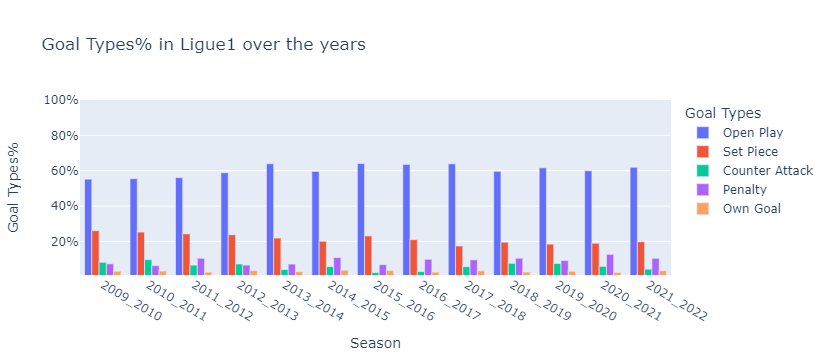

In [20]:
ligue1_goal_type = get_league_goal_type_df('Ligue1')
grouped_bar_chart_goals_type(ligue1_goal_type, 'Ligue1')

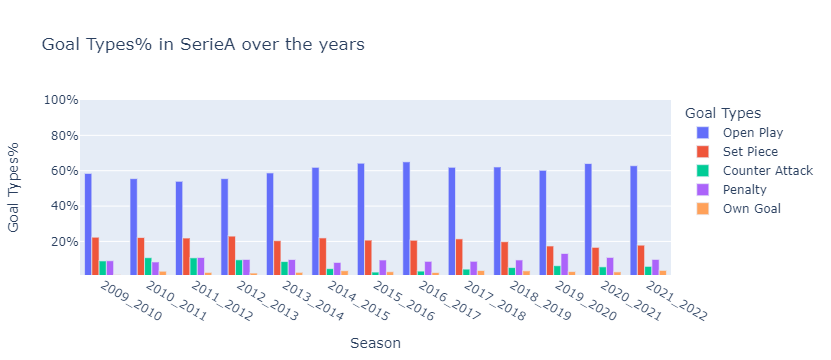

In [21]:
seriea_goal_type = get_league_goal_type_df('SerieA')
grouped_bar_chart_goals_type(seriea_goal_type, 'SerieA')

## Open Play Box Plot

In [22]:
def goal_type_box_plot(league, goal_type):
    fig = go.Figure()
    goal_type_mean = []
    season = []

    for dir in os.listdir(f'data\\{league}'):
        path = os.path.join(f'data\\{league}', dir, 'stage-goals-for.csv')
        df = pd.read_csv(path)
        fig.add_trace(go.Box(y=df[goal_type],
                             name=dir, fillcolor='aqua',
                             line={'color' : 'blue'}
                            ))
        goal_type_mean.append(df[goal_type].mean())
        season.append(dir)

    fig.add_scatter(x=season, y=goal_type_mean, name=f"Average number of {goal_type}", line={'color': 'red'})
    fig.update_layout(
        title=f"{goal_type} Distribution in {league} over the years",
        xaxis_title="Season",
        yaxis_title=f"{goal_type} Distrubution",
        width=850,
        height=500
    )
    fig.show()

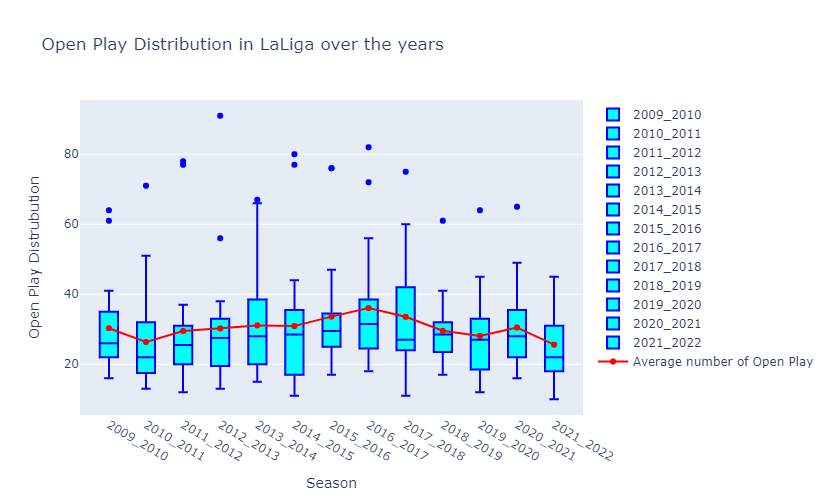

In [23]:
goal_type_box_plot('LaLiga', 'Open Play')

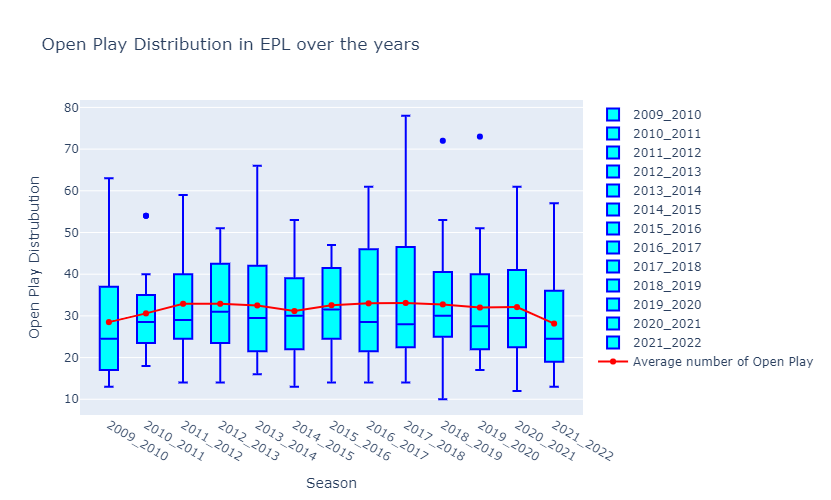

In [24]:
goal_type_box_plot('EPL', 'Open Play')

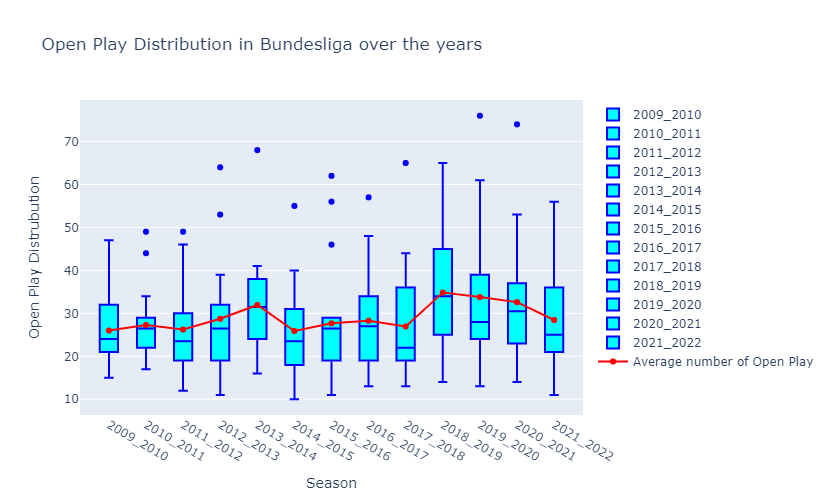

In [25]:
goal_type_box_plot('Bundesliga', 'Open Play')

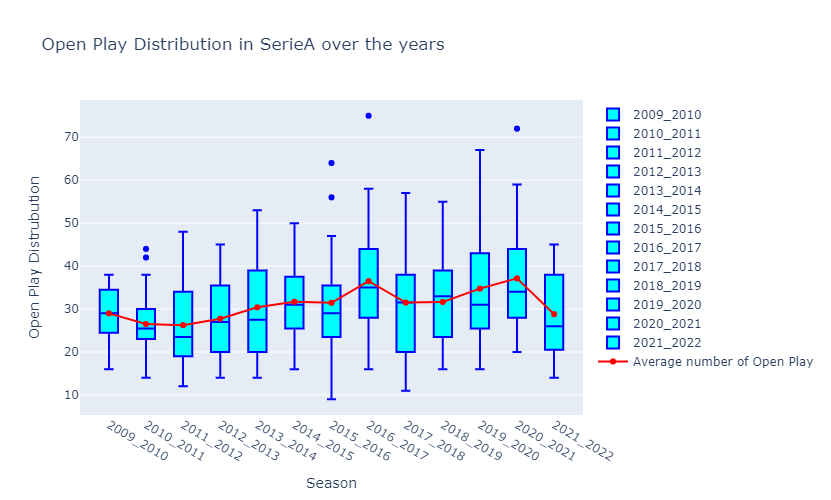

In [26]:
goal_type_box_plot('SerieA', 'Open Play')

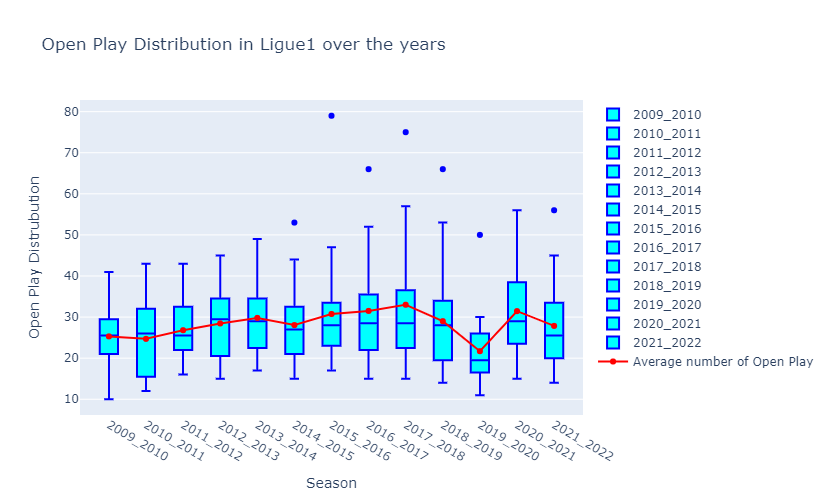

In [27]:
goal_type_box_plot('Ligue1', 'Open Play')

## Counter attack box plot

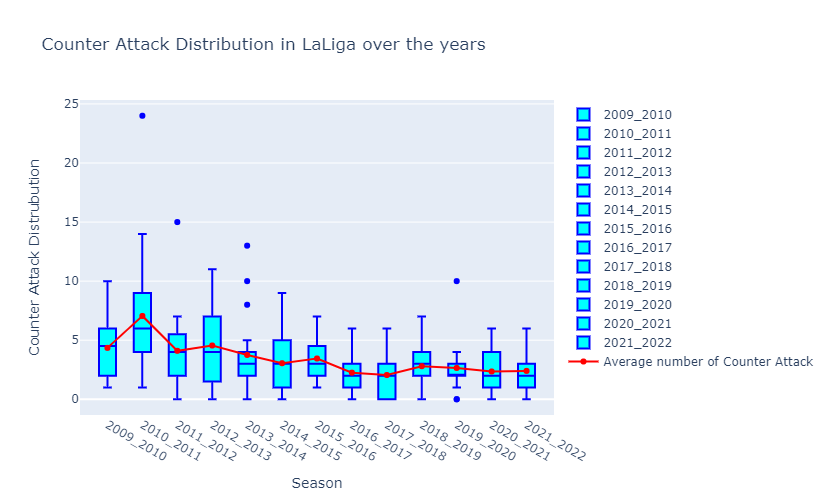

In [28]:
goal_type_box_plot('LaLiga', 'Counter Attack')

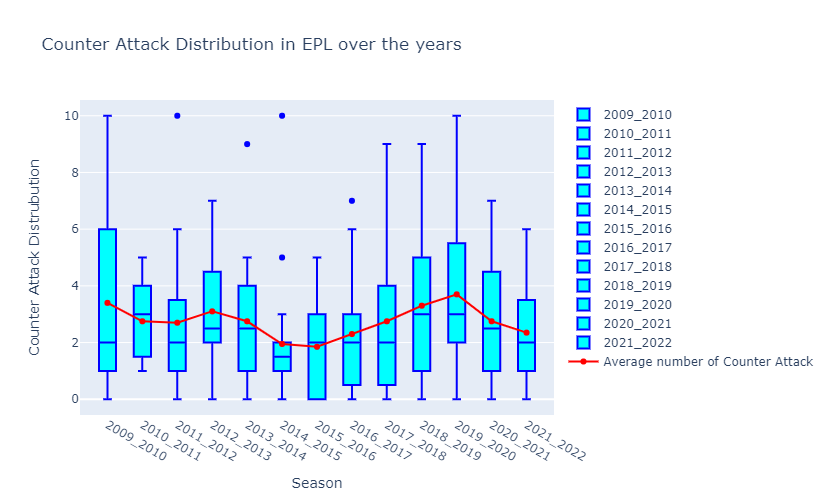

In [29]:
goal_type_box_plot('EPL', 'Counter Attack')

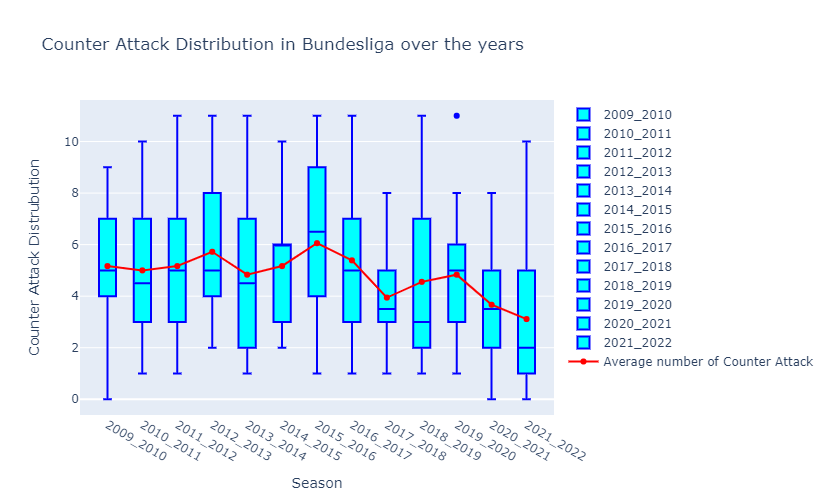

In [30]:
goal_type_box_plot('Bundesliga', 'Counter Attack')

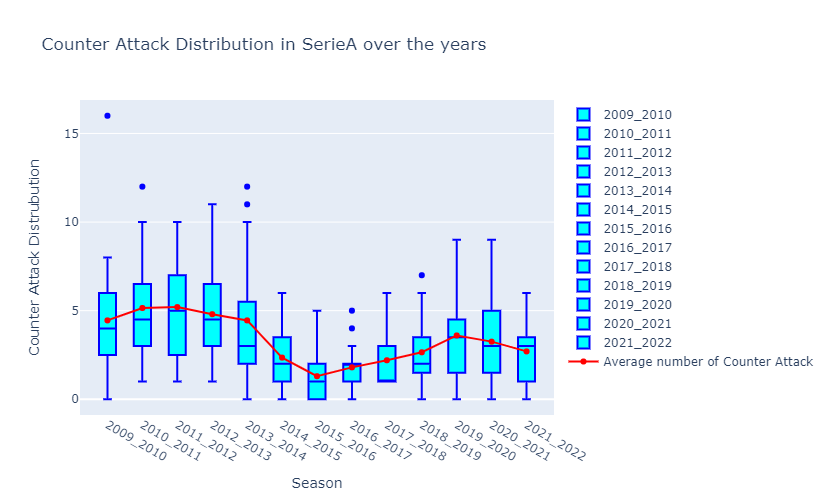

In [31]:
goal_type_box_plot('SerieA', 'Counter Attack')

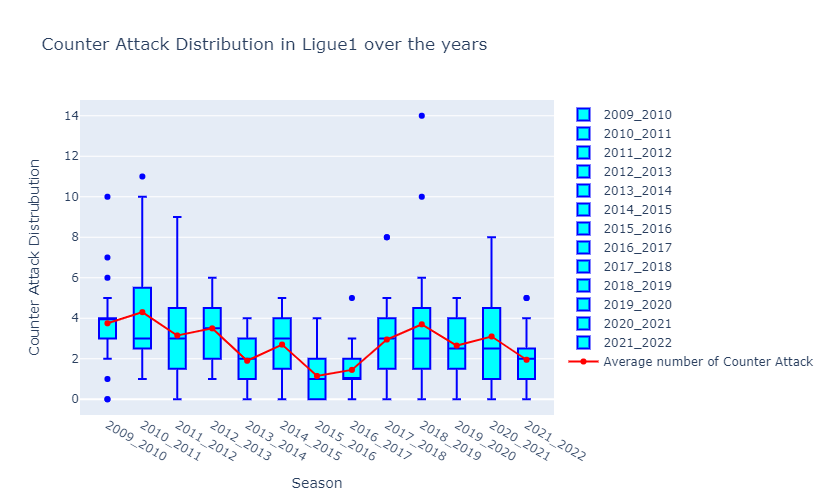

In [32]:
goal_type_box_plot('Ligue1', 'Counter Attack')

## Set Piece

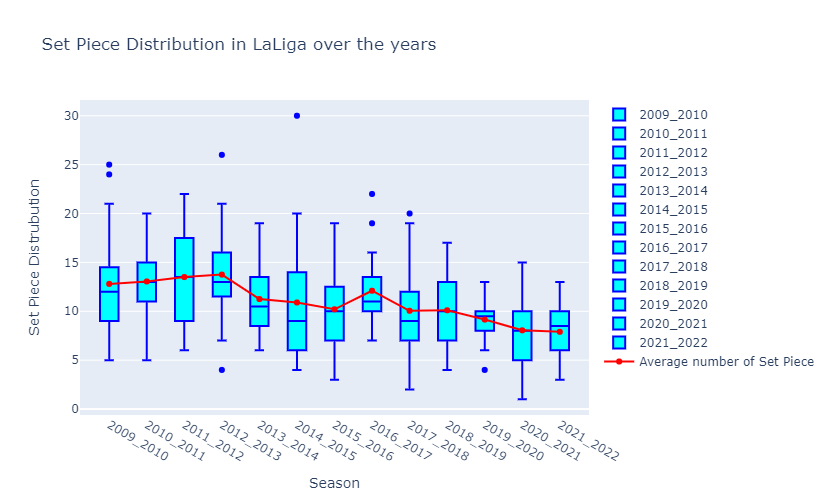

In [33]:
goal_type_box_plot('LaLiga', 'Set Piece')

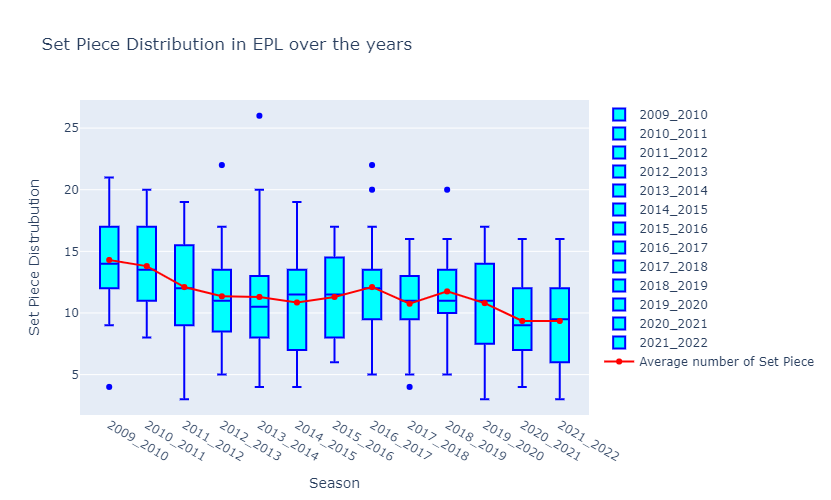

In [34]:
goal_type_box_plot('EPL', 'Set Piece')

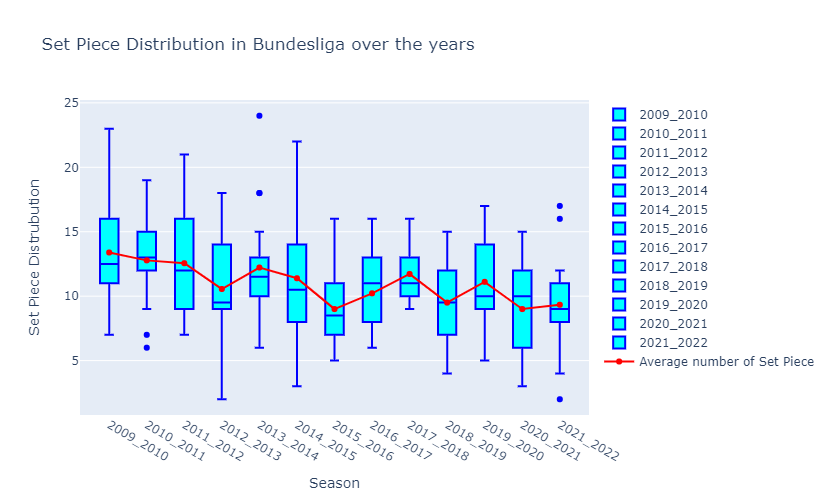

In [35]:
goal_type_box_plot('Bundesliga', 'Set Piece')

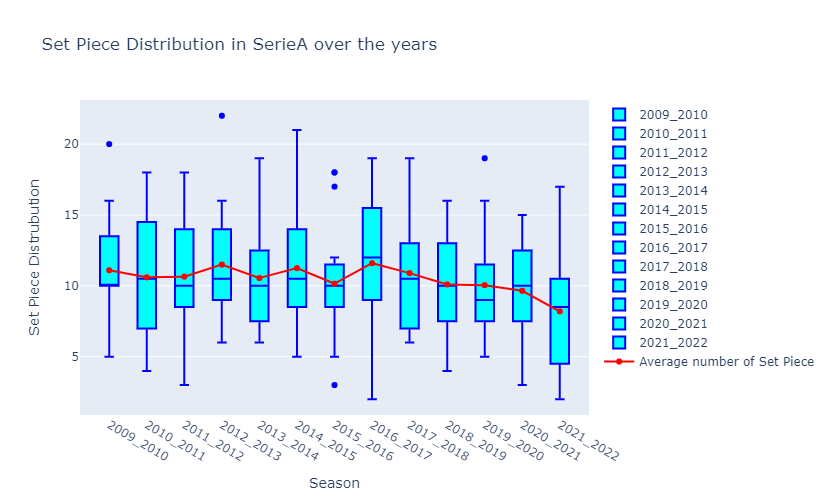

In [36]:
goal_type_box_plot('SerieA', 'Set Piece')

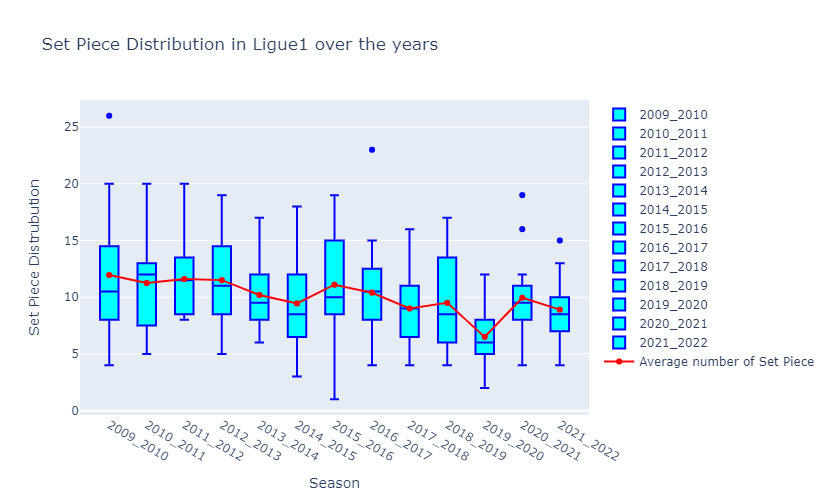

In [37]:
goal_type_box_plot('Ligue1', 'Set Piece')

## Penalty

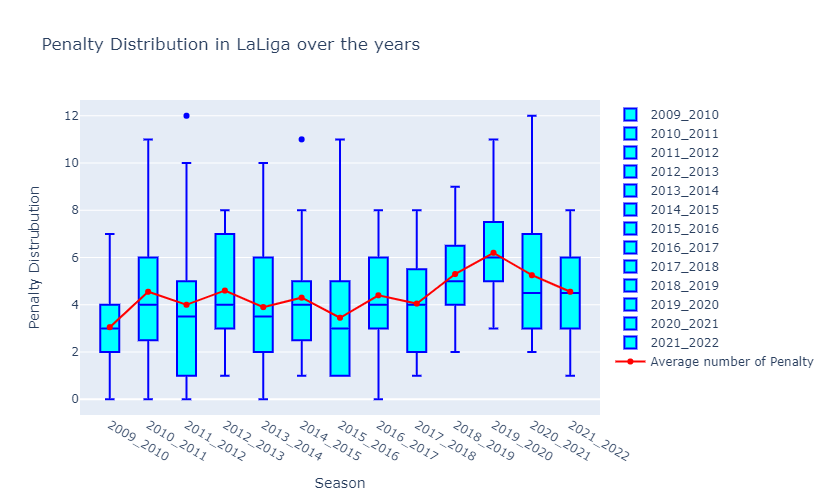

In [38]:
goal_type_box_plot('LaLiga', 'Penalty')

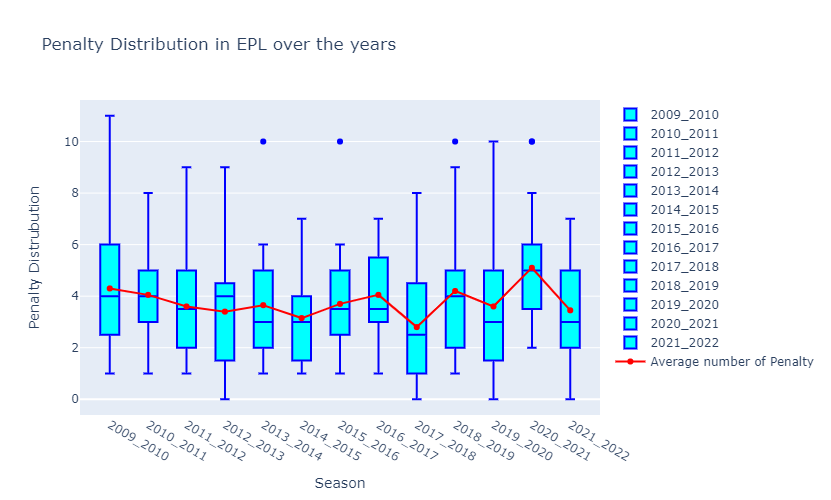

In [39]:
goal_type_box_plot('EPL', 'Penalty')

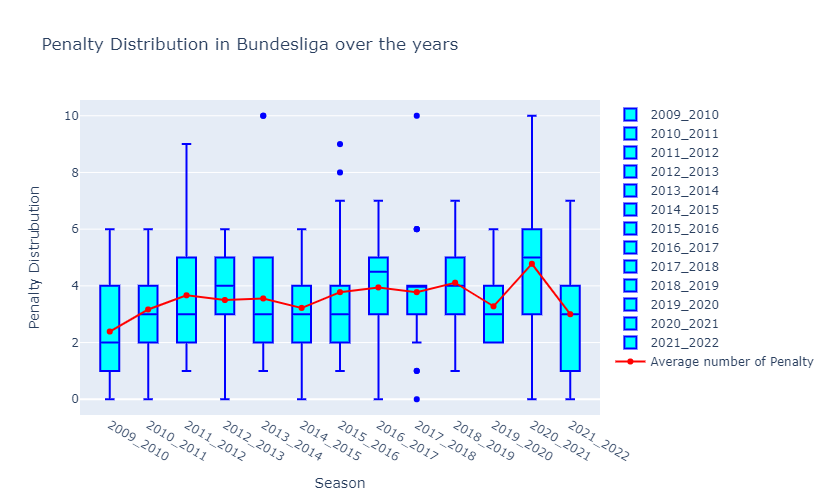

In [40]:
goal_type_box_plot('Bundesliga', 'Penalty')

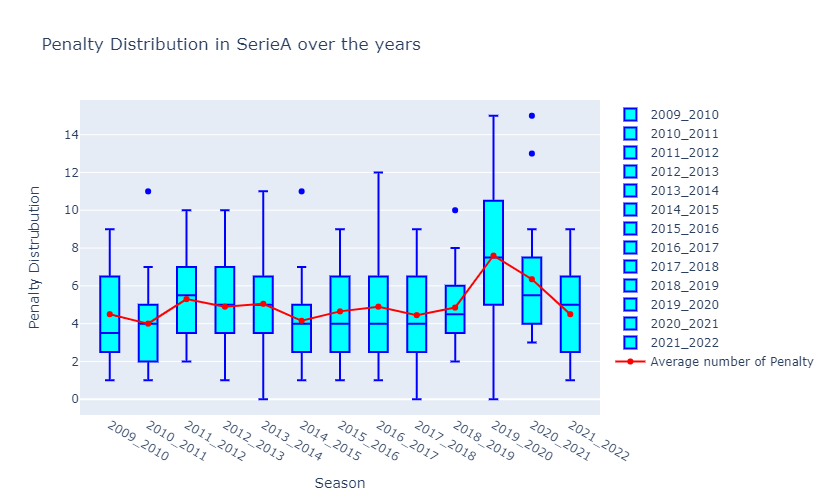

In [41]:
goal_type_box_plot('SerieA', 'Penalty')

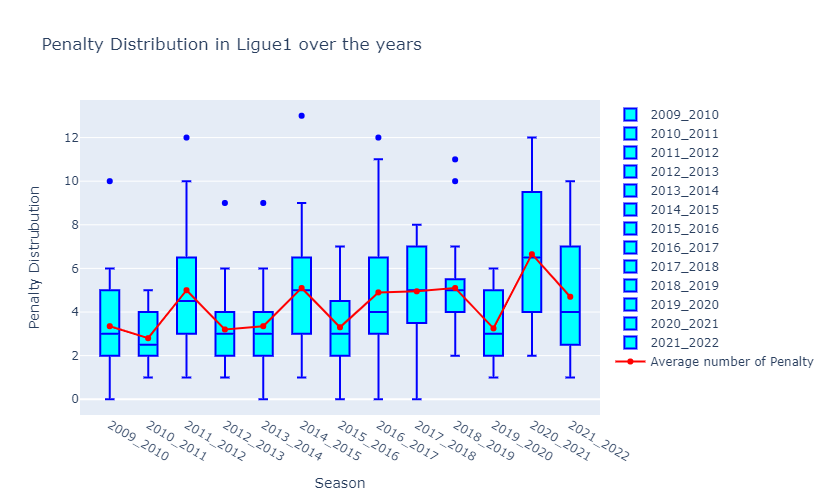

In [42]:
goal_type_box_plot('Ligue1', 'Penalty')

# Pass Types

In [43]:
def get_league_pass_type_df(league):
    all_team_stats = {
        "Season": [],
        "Short Passes pg": [],
        "Long Balls pg": [],
        "Cross pg": [],
        "Through Ball pg": []
    }

    for dir in os.listdir(f'data\\{league}'):
        all_team_stats["Season"].append(dir)
        path = os.path.join(f'data\\{league}', dir, 'stage-passes-for.csv')
        df = pd.read_csv(path)
        all_team_stats["Short Passes pg"].append(df["Short Passes pg"].sum())
        all_team_stats["Long Balls pg"].append(df["Long Balls pg"].sum())
        all_team_stats["Cross pg"].append(df["Cross pg"].sum())
        all_team_stats["Through Ball pg"].append(df["Through Ball pg"].sum())

    all_team_stats_df = pd.DataFrame.from_dict(all_team_stats)
    return all_team_stats_df

In [44]:
def grouped_bar_chart_pass_type(league_pass_type, league):
    x = league_pass_type['Season']
    pass_type = ['Short Passes pg', 'Long Balls pg', 'Cross pg', 'Through Ball pg']
    league_pass_type_normalized = league_pass_type[pass_type].div(league_pass_type[pass_type].sum(axis=1), axis=0) * 100
    
    fig = go.Figure(data=[
        go.Bar(name='Short Passes pg', x=x, y=league_pass_type_normalized['Short Passes pg']),
        go.Bar(name='Long Balls pg', x=x, y=league_pass_type_normalized['Long Balls pg']),
        go.Bar(name='Cross pg', x=x, y=league_pass_type_normalized['Cross pg']),
        go.Bar(name='Through Ball pg', x=x, y=league_pass_type_normalized['Through Ball pg'])
    ])
    fig.update_layout(
        barmode='group',
        title=f"Pass Types% in {league} over the years",
        xaxis_title="Season",
        yaxis_title="Pass Types%",
        legend_title="Pass Types",
        yaxis=dict(
            type='linear',
            range=[1, 100],
            ticksuffix='%'))
    fig.show()

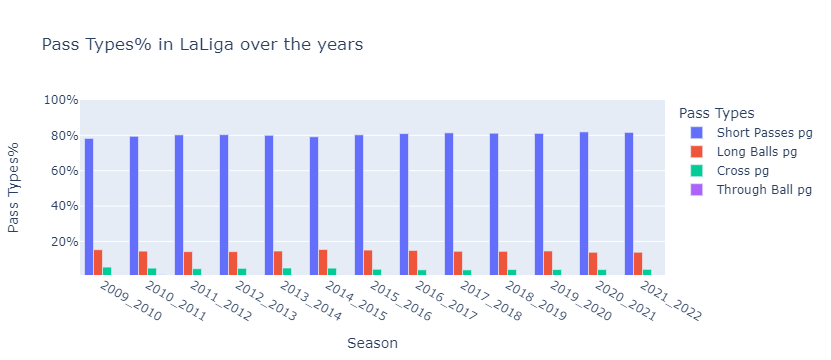

In [45]:
laliga_pass_type = get_league_pass_type_df('LaLiga')
grouped_bar_chart_pass_type(laliga_pass_type, 'LaLiga')

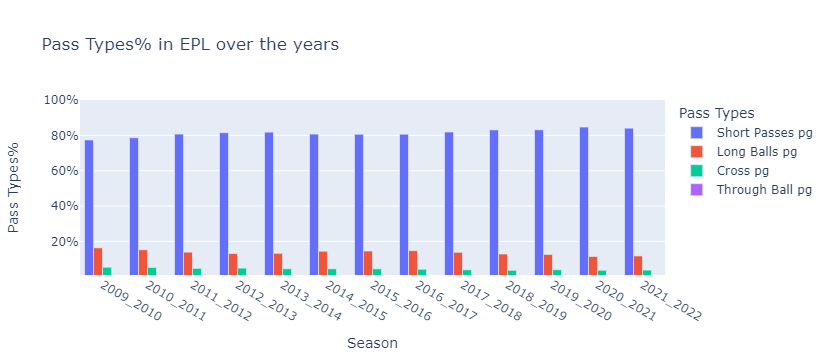

In [46]:
epl_pass_type = get_league_pass_type_df('EPL')
grouped_bar_chart_pass_type(epl_pass_type, 'EPL')

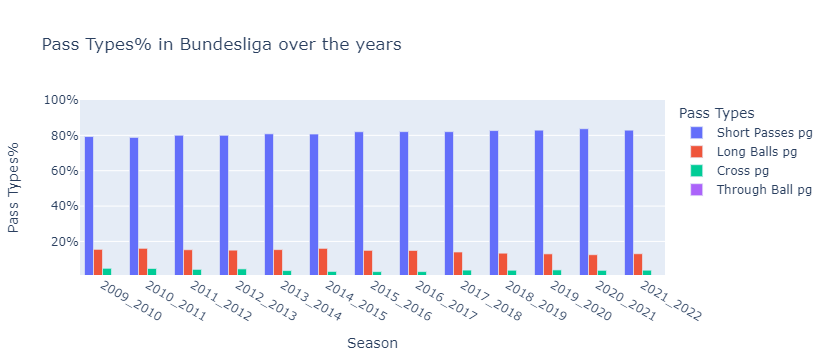

In [47]:
bundesliga_pass_type = get_league_pass_type_df('Bundesliga')
grouped_bar_chart_pass_type(bundesliga_pass_type, 'Bundesliga')

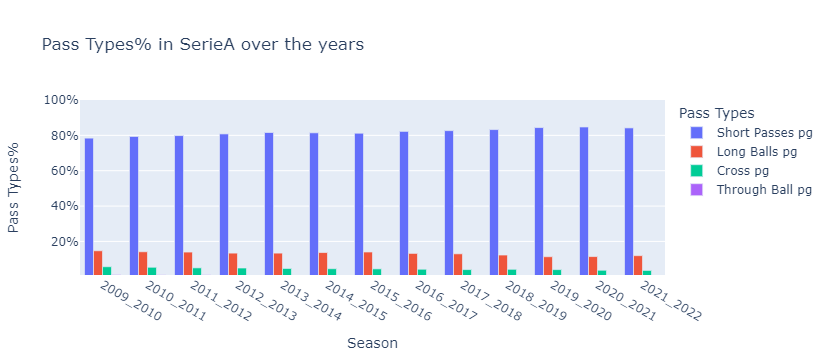

In [48]:
seriea_pass_type = get_league_pass_type_df('SerieA')
grouped_bar_chart_pass_type(seriea_pass_type, 'SerieA')

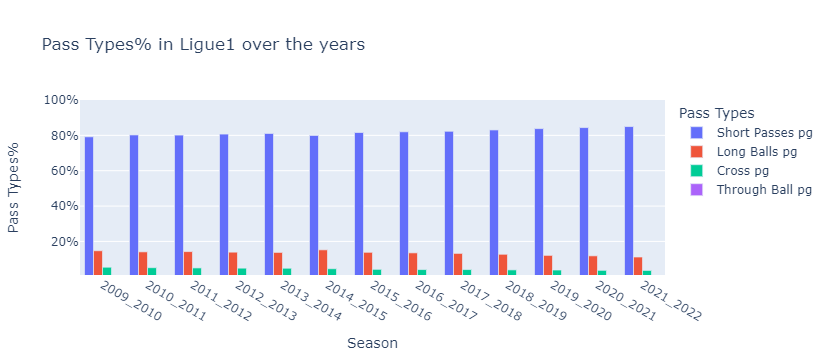

In [49]:
ligue1_pass_type = get_league_pass_type_df('Ligue1')
grouped_bar_chart_pass_type(ligue1_pass_type, 'Ligue1')

In [50]:
def pass_type_box_plot(league, pass_type):
    fig = go.Figure()
    pass_type_mean = []
    season = []

    for dir in os.listdir(f'data\\{league}'):
        path = os.path.join(f'data\\{league}', dir, 'stage-passes-for.csv')
        df = pd.read_csv(path)
        fig.add_trace(go.Box(y=df[pass_type],
                             name=dir, fillcolor='yellow',
                             line={'color' : 'orange'}
                            ))
        pass_type_mean.append(df[pass_type].mean())
        season.append(dir)

    fig.add_scatter(x=season, y=pass_type_mean, name=f"Average number of {pass_type}", line={'color': 'blue'})
    fig.update_layout(
        title=f"{pass_type} Distribution in {league} over the years",
        xaxis_title="Season",
        yaxis_title=f"{pass_type} Distrubution",
        width=850,
        height=500
    )
    fig.show()

## Short passes

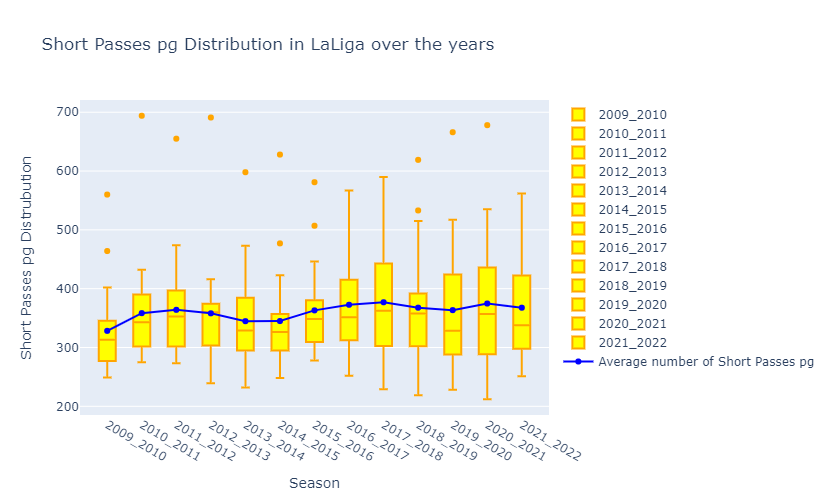

In [51]:
pass_type_box_plot('LaLiga', 'Short Passes pg')

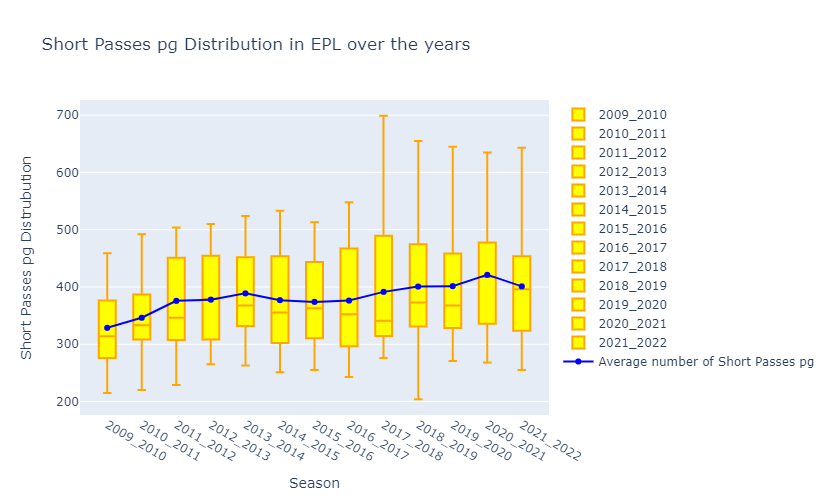

In [52]:
pass_type_box_plot('EPL', 'Short Passes pg')

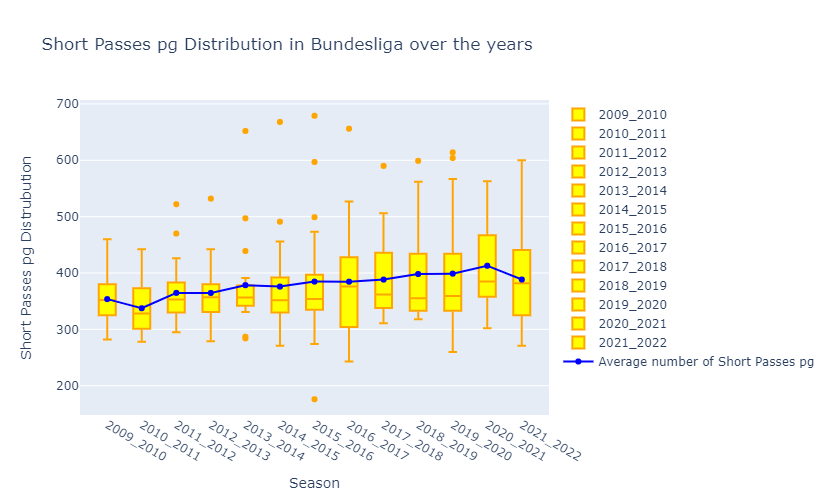

In [53]:
pass_type_box_plot('Bundesliga', 'Short Passes pg')

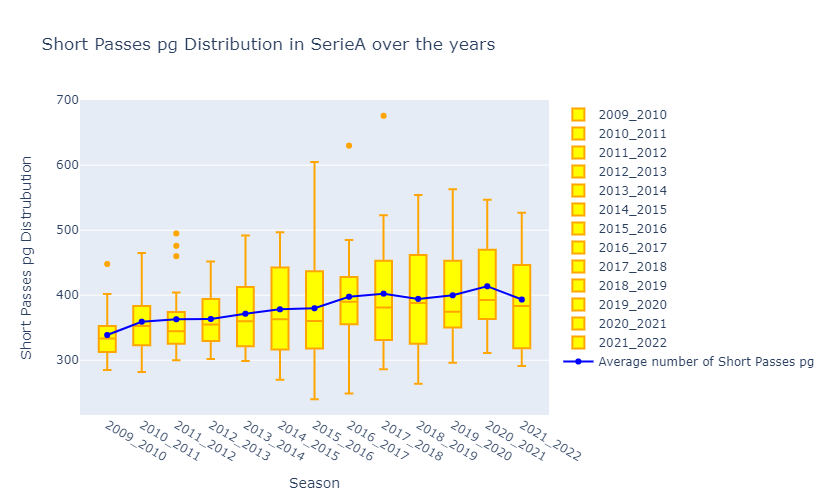

In [54]:
pass_type_box_plot('SerieA', 'Short Passes pg')

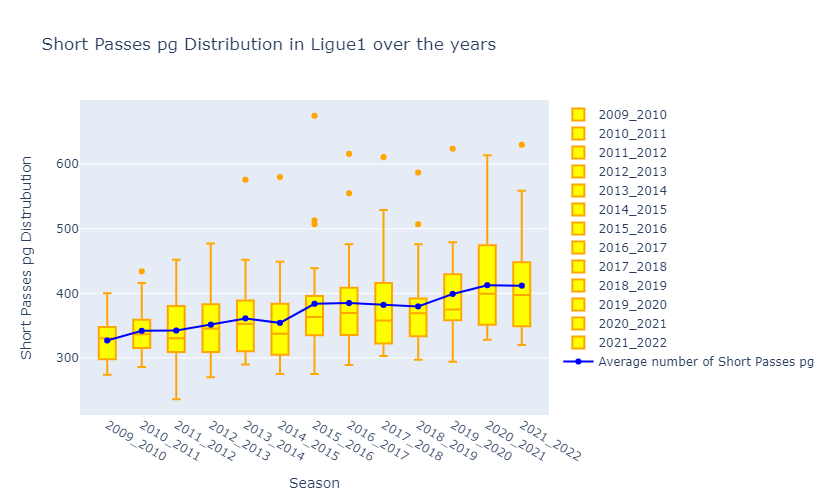

In [55]:
pass_type_box_plot('Ligue1', 'Short Passes pg')

## Long Passes

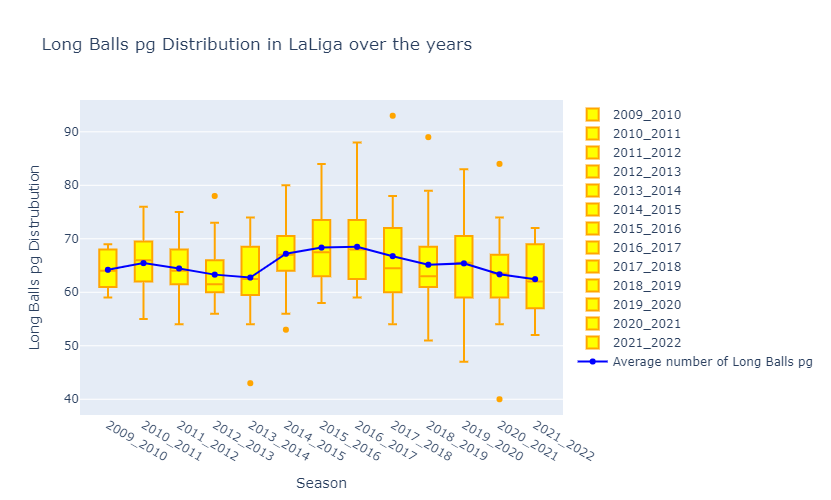

In [57]:
pass_type_box_plot('LaLiga', 'Long Balls pg')

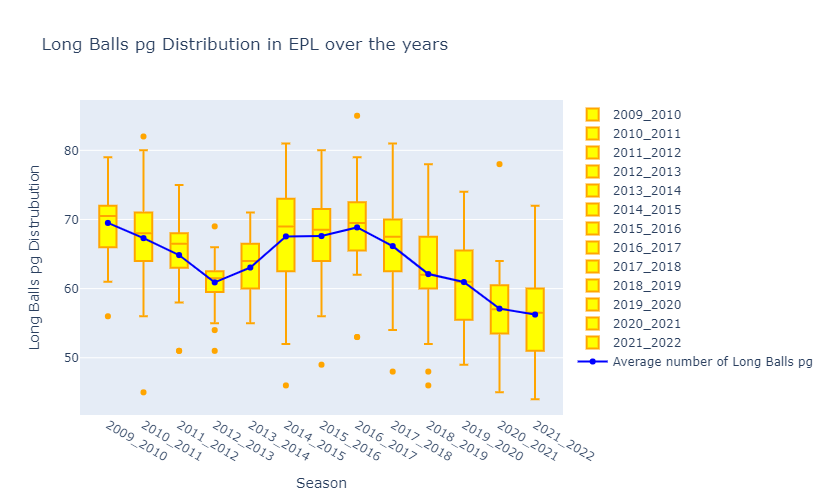

In [58]:
pass_type_box_plot('EPL', 'Long Balls pg')

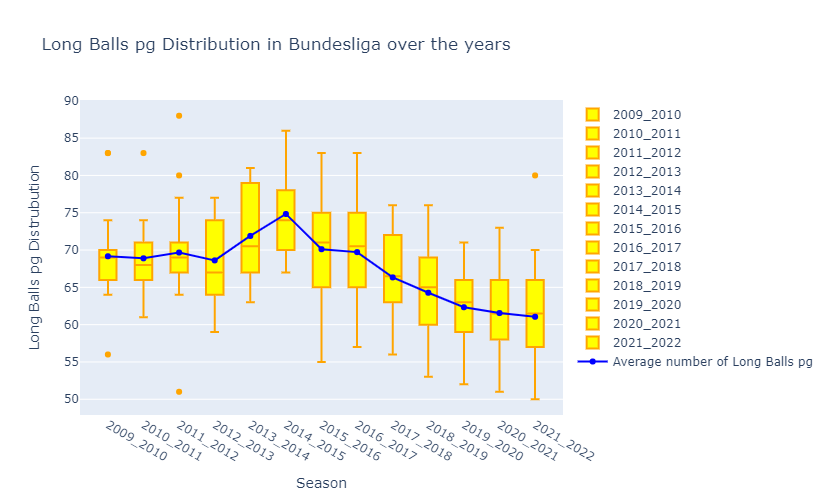

In [59]:
pass_type_box_plot('Bundesliga', 'Long Balls pg')

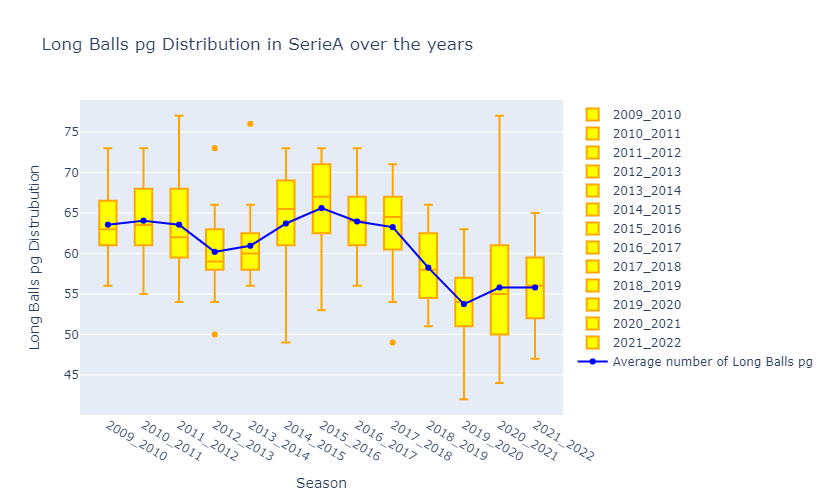

In [60]:
pass_type_box_plot('SerieA', 'Long Balls pg')

pass_type_box_plot('LaLiga', 'Long Balls pg')

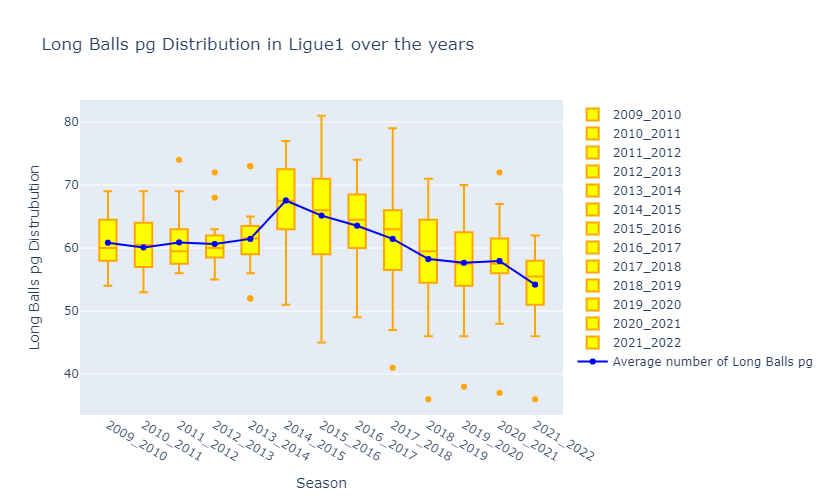

In [61]:
pass_type_box_plot('Ligue1', 'Long Balls pg')

## Crosses

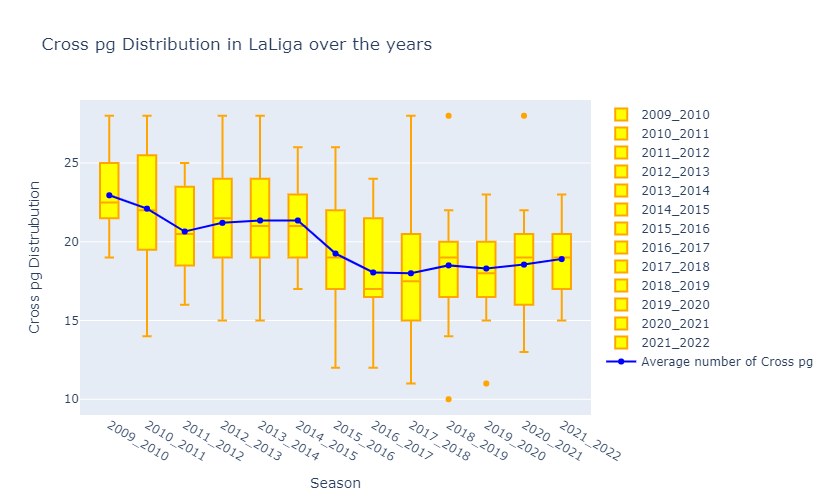

In [63]:
pass_type_box_plot('LaLiga', 'Cross pg')

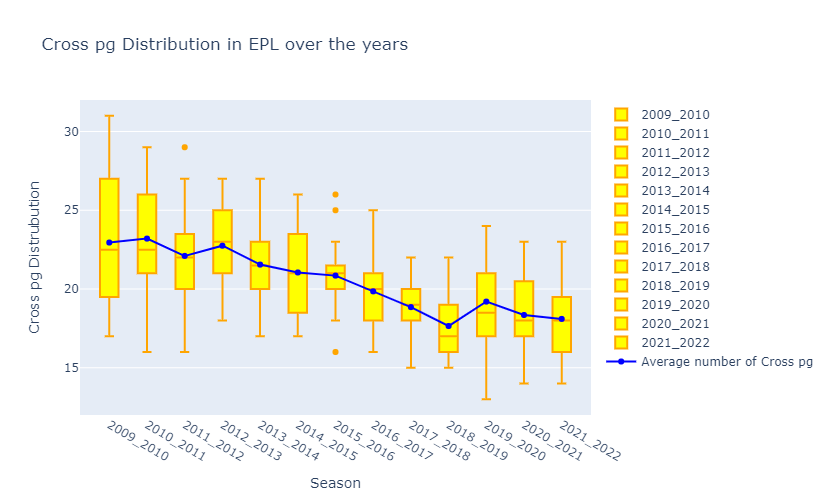

In [64]:
pass_type_box_plot('EPL', 'Cross pg')

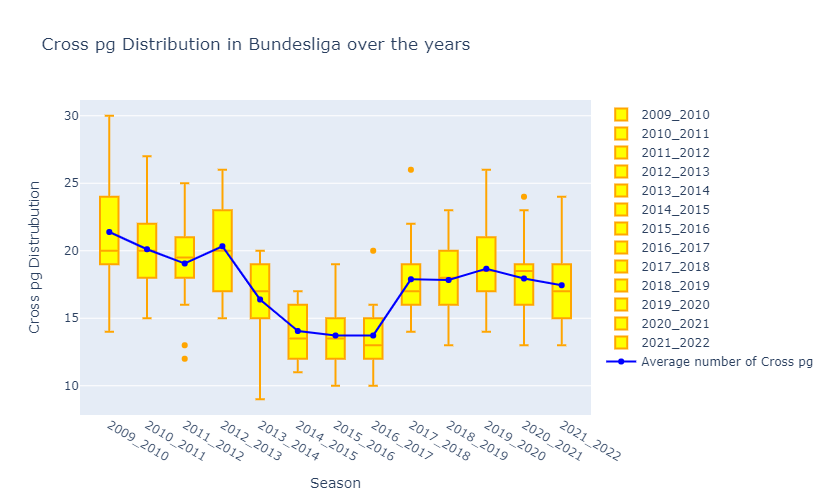

In [65]:
pass_type_box_plot('Bundesliga', 'Cross pg')

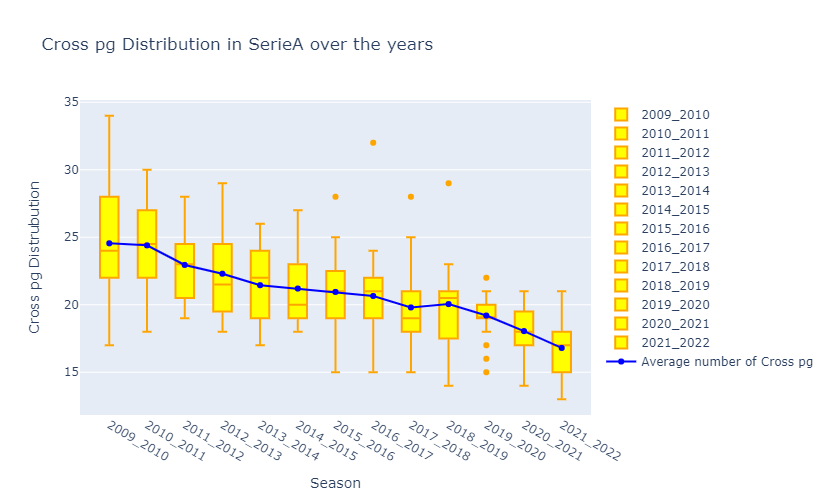

In [66]:
pass_type_box_plot('SerieA', 'Cross pg')

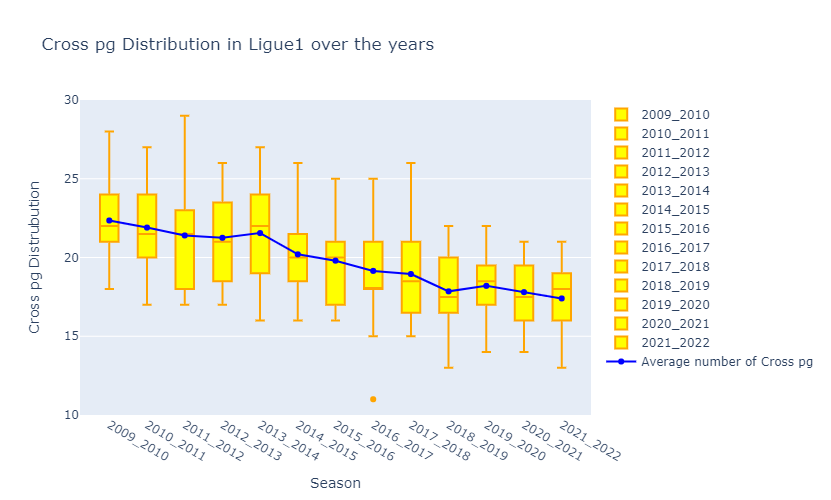

In [67]:
pass_type_box_plot('Ligue1', 'Cross pg')

## Through Ball

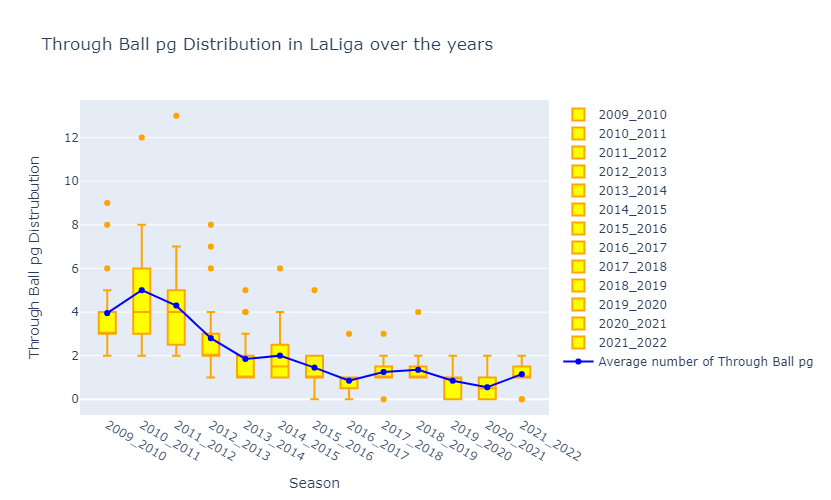

In [68]:
pass_type_box_plot('LaLiga', 'Through Ball pg')

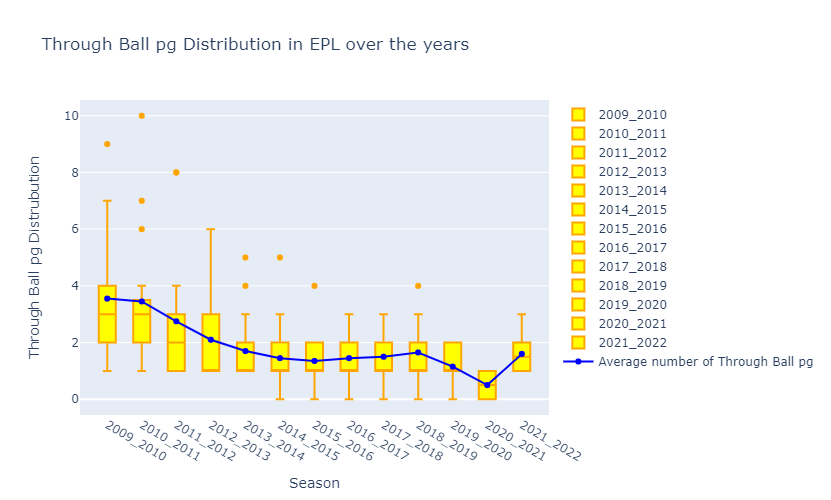

In [69]:
pass_type_box_plot('EPL', 'Through Ball pg')

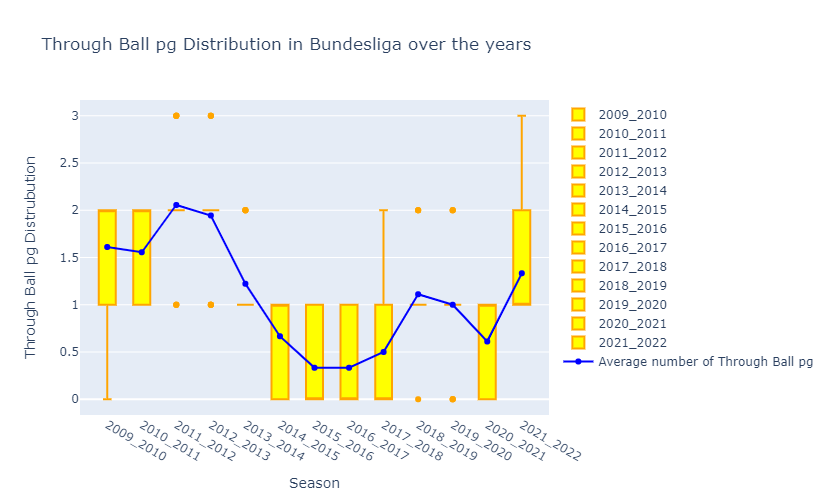

In [70]:
pass_type_box_plot('Bundesliga', 'Through Ball pg')

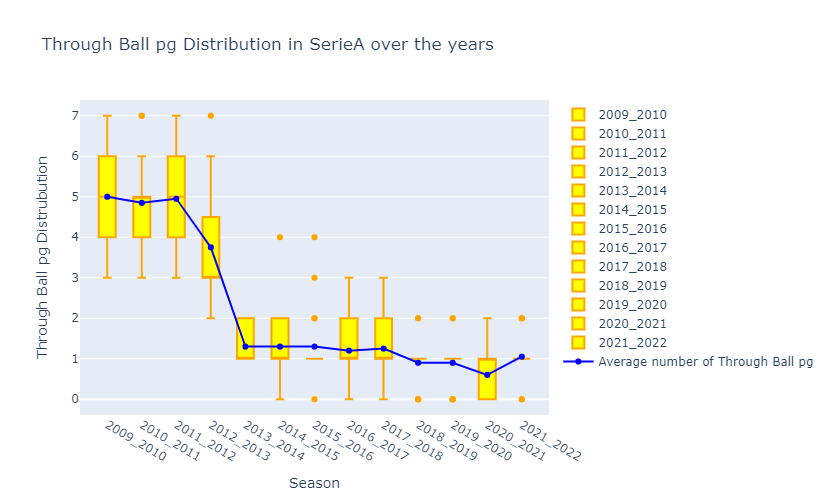

In [71]:
pass_type_box_plot('SerieA', 'Through Ball pg')

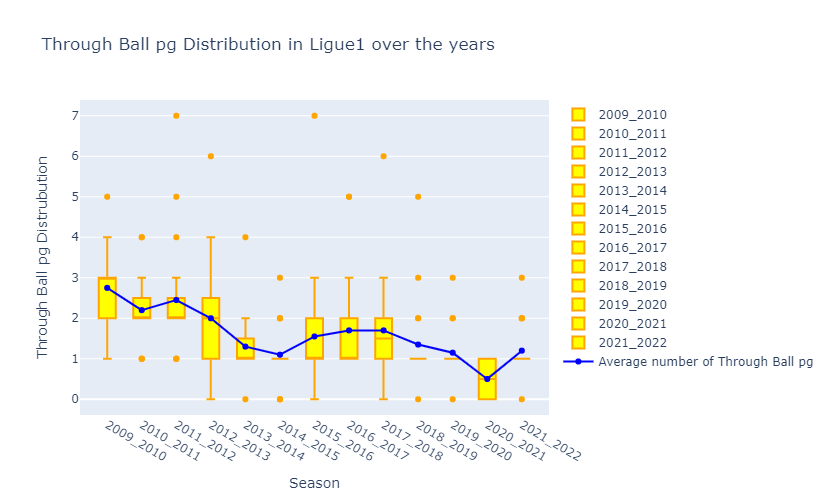

In [72]:
pass_type_box_plot('Ligue1', 'Through Ball pg')